In [1]:
# Import modules, warnings and OS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

pwd = os.getcwd()

### Data cleaning of climate data

In [2]:
# Reading the data

global_temp_country = pd.read_csv(pwd + "\\GlobalLandTemperaturesByCountry.csv")
global_temp_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
# Testing for Croatia

global_temp_country.loc[global_temp_country["Country"] == "Croatia"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
125541,1743-11-01,7.225,2.300,Croatia
125542,1743-12-01,NaN,NaN,Croatia
125543,1744-01-01,NaN,NaN,Croatia
125544,1744-02-01,NaN,NaN,Croatia
125545,1744-03-01,NaN,NaN,Croatia
...,...,...,...,...
128775,2013-05-01,16.502,0.311,Croatia
128776,2013-06-01,20.418,0.290,Croatia
128777,2013-07-01,23.809,0.416,Croatia
128778,2013-08-01,23.560,0.426,Croatia


In [4]:
global_temp_country.shape

(577462, 4)

In [5]:
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [6]:
# Deletint Nan Values for Average Temperature

global_temp_country.dropna(axis = "index", how = "any", subset = ["AverageTemperature"], inplace = True)
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [7]:
global_temp_country["Country"].nunique()

242

In [8]:
global_temp_country["Country"].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

### Changing some country names

In [9]:
dict_replace = {
    'Denmark (Europe)': "Denmark",
    'France (Europe)': "France",
    'Netherlands (Europe)': "Netherlands",
    'United Kingdom (Europe)': "United Kingdom",
    'Congo (Democratic Republic of The)': "Congo"
}

In [10]:
global_temp_country["Country"].replace(dict_replace, inplace = True)

### Mean temperature of average temperatures from years 1743 - 2013 for every country

In [11]:
pd.set_option('display.max_rows',243)
avg_temp = global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
avg_temp.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [12]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [13]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

In [14]:
fig_1 = px.choropleth(avg_temp, locations = 'Country', locationmode = 'country names', color = 'AverageTemperature')
fig_1.update_layout(title = 'Choropleth Map of Average Temperature (1743 - 2013)', template = "plotly_dark")
fig_1.show()

### Sorting the countries by the average temperature and ploting Horizontal Bar

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

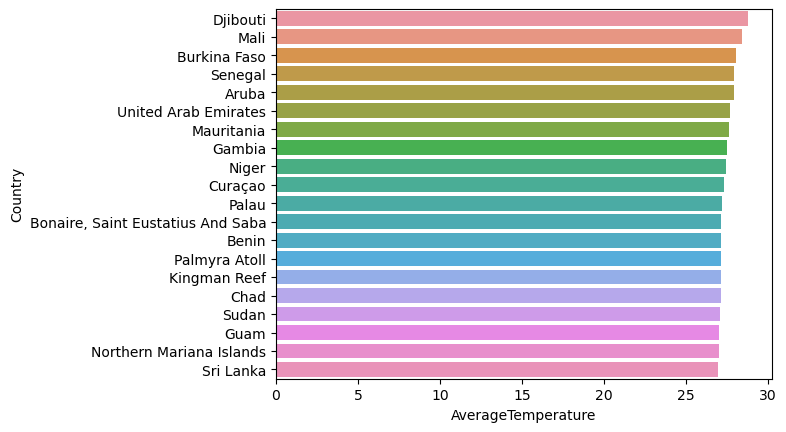

In [15]:
sns.barplot(x = avg_temp.sort_values(by = 'AverageTemperature', ascending = False)
['AverageTemperature'][0:20], y = avg_temp.sort_values(by = 'AverageTemperature', ascending = False)['Country'][0:20])

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

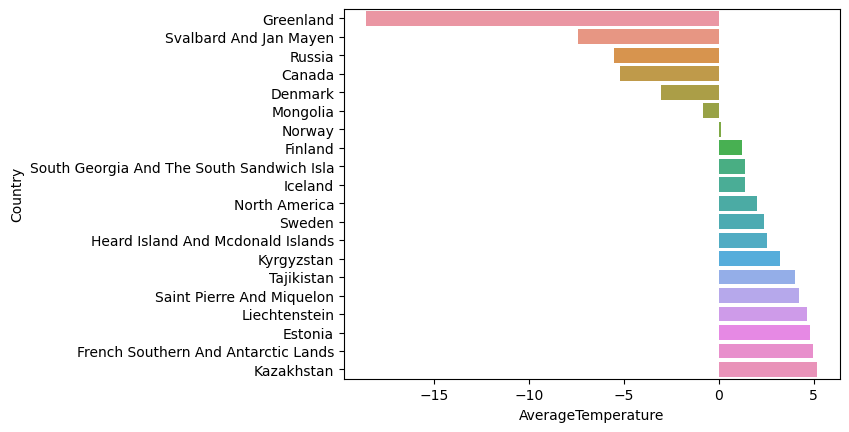

In [16]:
sns.barplot(x = avg_temp.sort_values(by = 'AverageTemperature', ascending = True)
['AverageTemperature'][0:20], y = avg_temp.sort_values(by = 'AverageTemperature', ascending = True)['Country'][0:20])

### Is there a global warming?

In [17]:
global_temps = pd.read_csv(pwd + "\\GlobalTemperatures.csv")
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [18]:
## Make column with years

def put_year(date):
    return date.split("-")[0]

global_temps["year"] = global_temps["dt"].apply(put_year)

global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


In [19]:
data_global = global_temps.groupby('year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data_global.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [20]:
data_global['Uncertainty_top'] = data_global['LandAverageTemperature'] + data_global['LandAverageTemperatureUncertainty']
data_global['Uncertainty_bottom'] = data_global['LandAverageTemperature'] - data_global['LandAverageTemperatureUncertainty']

data_global

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
...,...,...,...,...,...
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500


In [21]:
data_global["year"] = pd.to_numeric(data_global["year"])

In [22]:
fig_2 = px.line(data_global, 
                x = "year", 
                y = [ "Uncertainty_top","LandAverageTemperature", "Uncertainty_bottom"], 
                title = "Average Land Temperature", template= "plotly_dark",
                labels = {
                    "year": "Years (1750 - 2014)",
                    "value": "Temperature",
                    })
fig_2.update_yaxes(tickvals=[0,5,10,15,20])
fig_2.update_xaxes(tickvals=[1700, 1750, 1800, 1850, 1900, 1950, 2000])
fig_2.show()

In [23]:
fig_3 = px.line(data_global.loc[data_global["year"] >= 1900], 
                x = "year", 
                y = [ "Uncertainty_top","LandAverageTemperature", "Uncertainty_bottom"], 
                title = "Average Land Temperature", template= "plotly_dark",
                labels = {
                    "year": "Years (1900 - 2014)",
                    "value": "Temperature",
                    })
                    
fig_3.update_xaxes(tickvals=[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
fig_3.show()

### Average temperatures in seasons

In [24]:
global_temps['dt'] = pd.to_datetime(global_temps['dt'])


In [25]:
global_temps["Month"] = global_temps['dt'].dt.month
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,Month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11


In [26]:
#  Making function for putting mounths into seasons

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [27]:
# Putting season column in the table with function 

global_temps["Season"] = global_temps["Month"].apply(get_season)
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,Month,Season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8,summer
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9,autumn
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10,autumn
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11,autumn


In [28]:
# Making a table where every year have mean values of season temperatures

years = global_temps['year'].unique()

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    current_year = global_temps[global_temps["year"] == year]
    spring_temps.append(current_year[current_year['Season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_year[current_year['Season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_year[current_year['Season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_year[current_year['Season'] == 'winter']['LandAverageTemperature'].mean())

data_seasons = pd.DataFrame()
data_seasons["year"] = years
data_seasons["spring_temp"] = spring_temps
data_seasons["summer_temp"] = summer_temps
data_seasons["autumn_temp"] = autumn_temps
data_seasons["winter_temp"] = winter_temps

data_seasons

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [29]:
fig_3 = px.line(data_seasons, 
            x = "year",
            y = ['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], 
            title = "Average temperature in each season", template="plotly_dark",
            labels = {
                    "year": "Years (1750 - 2014)",
                    "value": "Temperature",
                    "variable": "Legend"
                    })
fig_3.update_yaxes(tickvals=[0,5,10,15,20])
fig_3.update_xaxes(tickvals=[1700, 1750, 1800, 1850, 1900, 1950, 2000])
fig_3.show()

### Trend in random countries

In [30]:
countries = ['United States', "China", "Croatia", "Trinidad And Tobago"]

In [31]:
european_temp = global_temp_country[global_temp_country["Country"].isin(countries)]
european_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
110149,1820-08-01,16.684,1.978,China
110150,1820-09-01,13.292,1.555,China
110151,1820-10-01,5.624,1.383,China
110152,1820-11-01,-1.981,1.340,China
110153,1820-12-01,-8.551,1.508,China
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [32]:
# Put year column
european_temp["year"] = european_temp["dt"].apply(put_year)
european_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
110149,1820-08-01,16.684,1.978,China,1820
110150,1820-09-01,13.292,1.555,China,1820
110151,1820-10-01,5.624,1.383,China,1820
110152,1820-11-01,-1.981,1.340,China,1820
110153,1820-12-01,-8.551,1.508,China,1820
...,...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States,2013
557817,2013-06-01,20.198,0.236,United States,2013
557818,2013-07-01,22.074,0.152,United States,2013
557819,2013-08-01,21.168,0.249,United States,2013


In [33]:
european_data = european_temp.groupby(["year", "Country"]).agg({"AverageTemperature":"mean"}).reset_index()
european_data

,year,Country,AverageTemperature
0,1743,Croatia,7.225000
1,1744,Croatia,12.950250
2,1745,Croatia,4.040000
3,1750,Croatia,12.012909
4,1751,Croatia,12.386625
...,...,...,...
837,2012,United States,10.261083
838,2013,China,9.295000
839,2013,Croatia,13.589000
840,2013,Trinidad And Tobago,27.086625


In [34]:
fig_4 = px.line(european_data, x = "year", y = "AverageTemperature", color = "Country", template = "plotly_dark", title= "Random Countries")
fig_4.show()

### USA Map for State temperatures

In [35]:
global_temp_state = pd.read_csv("GlobalLandTemperaturesByState.csv")

In [36]:
USA_data = global_temp_state[global_temp_state["Country"] == "United States"]

In [37]:
USA_data.dropna(inplace = True)

In [38]:
USA_data["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [39]:
USA_data["State"].replace({'Georgia (State)': 'Georgia', 'District Of Columbia': 'Columbia'}, inplace= True)
USA_data

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7463,1744-04-01,19.075,2.902,Alabama,United States
7464,1744-05-01,21.197,2.844,Alabama,United States
7465,1744-06-01,25.290,2.879,Alabama,United States
7466,1744-07-01,26.420,2.841,Alabama,United States
...,...,...,...,...,...
626435,2013-05-01,10.607,0.208,Wyoming,United States
626436,2013-06-01,16.267,0.276,Wyoming,United States
626437,2013-07-01,20.222,0.133,Wyoming,United States
626438,2013-08-01,19.621,0.217,Wyoming,United States


In [40]:
USA_data = USA_data[["AverageTemperature", "State"]]

In [41]:
USA_temp = USA_data.groupby('State')['AverageTemperature'].mean().reset_index()
print(USA_temp.head(), USA_temp.shape)


        State  AverageTemperature
0     Alabama           17.066138
1      Alaska           -4.890738
2     Arizona           15.381526
3    Arkansas           15.573963
4  California           14.327677 (51, 2)


In [42]:
!pip install opencage

In [43]:
from opencage.geocoder import OpenCageGeocode

In [44]:
key = '5ca89e8267cb476a88cd247f5d0dc35d'  # get api key from:  https://opencagedata.com/api
geocoder = OpenCageGeocode(key)
query = 'Zagreb, Croatia'  
results = geocoder.geocode(query)
print(results)

[{'annotations': {'DMS': {'lat': "45° 50' 33.50904'' N", 'lng': "15° 57' 44.03340'' E"}, 'MGRS': '33TWL7471877014', 'Maidenhead': 'JN75xu52lf', 'Mercator': {'x': 1776907.48, 'y': 5724500.33}, 'NUTS': {'NUTS0': {'code': 'HR'}, 'NUTS1': {'code': 'HR0'}, 'NUTS2': {'code': 'HR05'}, 'NUTS3': {'code': 'HR050'}}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=3168167#map=16/45.84264/15.96223', 'note_url': 'https://www.openstreetmap.org/note/new#map=16/45.84264/15.96223&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=45.84264&mlon=15.96223#map=16/45.84264/15.96223'}, 'UN_M49': {'regions': {'EUROPE': '150', 'HR': '191', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 385, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '€', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separ

In [45]:
lat = results[0]['geometry']['lat']
lon = results[0]['geometry']['lng']
print(lat, lon)

45.8426414 15.9622315


In [46]:
# Making list of all lat and lon for every state

list_lat = []
list_lon = []
for state in USA_temp["State"]:
    results = geocoder.geocode(state)
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_lon.append(lon)



In [47]:
# Creating new column from list 

USA_temp["lat"] = list_lat
USA_temp["lon"] = list_lon

In [48]:
USA_temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [49]:
import folium
from folium.plugins import HeatMap
basemap_1 = folium.Map()

In [50]:
HeatMap(USA_temp[["lat", "lon", "AverageTemperature"]], zoom = 20, radius = 15).add_to(basemap_1)
basemap_1

### Analyse average temperature of Croatia major cities by month

In [60]:
data_cities = pd.read_csv("GlobalLandTemperaturesByCity.csv")
data_cities.head

<bound method NDFrame.head of                  dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   

In [53]:
data_cities.shape

(8599212, 7)

In [57]:
croatia_cities = data_cities[data_cities['Country']=='Croatia']
croatia_cities


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6357537,1743-11-01,5.486,1.899,Rijeka,Croatia,45.81N,15.00E
6357538,1743-12-01,NaN,NaN,Rijeka,Croatia,45.81N,15.00E
6357539,1744-01-01,NaN,NaN,Rijeka,Croatia,45.81N,15.00E
6357540,1744-02-01,NaN,NaN,Rijeka,Croatia,45.81N,15.00E
6357541,1744-03-01,NaN,NaN,Rijeka,Croatia,45.81N,15.00E
...,...,...,...,...,...,...,...
8475704,2013-05-01,14.422,0.312,Zagreb,Croatia,45.81N,15.00E
8475705,2013-06-01,18.672,0.273,Zagreb,Croatia,45.81N,15.00E
8475706,2013-07-01,22.233,0.330,Zagreb,Croatia,45.81N,15.00E
8475707,2013-08-01,21.368,0.438,Zagreb,Croatia,45.81N,15.00E


In [59]:
croatia_cities["City"].unique()

array(['Rijeka', 'Split', 'Zagreb'], dtype=object)

In [70]:
# Remove N and E from Latitude and Longitude 
croatia_cities['Latitude'] = croatia_cities['Latitude'].str.strip('N')
croatia_cities['Longitude'] = croatia_cities['Longitude'].str.strip('E')

In [71]:
# Remove NaN values 
croatia_cities.dropna(axis = 0, subset = ['AverageTemperature'], inplace = True)
croatia_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6357537,1743-11-01,5.486,1.899,Rijeka,Croatia,45.81,15.00
6357542,1744-04-01,10.961,2.179,Rijeka,Croatia,45.81,15.00
6357543,1744-05-01,12.993,1.708,Rijeka,Croatia,45.81,15.00
6357544,1744-06-01,16.498,1.618,Rijeka,Croatia,45.81,15.00
6357545,1744-07-01,18.712,1.635,Rijeka,Croatia,45.81,15.00


In [73]:
# Making months column

croatia_cities["dt"] = pd.to_datetime(croatia_cities["dt"])

croatia_cities['Month'] = croatia_cities['dt'].dt.month
croatia_cities.drop('dt', axis = 1, inplace = True)
croatia_cities

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
6357537,5.486,1.899,Rijeka,Croatia,45.81,15.00,11
6357542,10.961,2.179,Rijeka,Croatia,45.81,15.00,4
6357543,12.993,1.708,Rijeka,Croatia,45.81,15.00,5
6357544,16.498,1.618,Rijeka,Croatia,45.81,15.00,6
6357545,18.712,1.635,Rijeka,Croatia,45.81,15.00,7
...,...,...,...,...,...,...,...
8475703,11.068,0.321,Zagreb,Croatia,45.81,15.00,4
8475704,14.422,0.312,Zagreb,Croatia,45.81,15.00,5
8475705,18.672,0.273,Zagreb,Croatia,45.81,15.00,6
8475706,22.233,0.330,Zagreb,Croatia,45.81,15.00,7


In [74]:
croatia_cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame()

AverageTemperature
Month City                      
1     Rijeka           -1.254528
      Split             2.623075
      Zagreb           -1.254528
2     Rijeka            0.739864
      Split             4.166530
      Zagreb            0.739864
3     Rijeka            4.601445
      Split             7.481581
      Zagreb            4.601445
4     Rijeka            9.179695
      Split            11.588124
      Zagreb            9.179695
5     Rijeka           14.176095
      Split            16.623468
      Zagreb           14.176095
6     Rijeka           17.759708
      Split            20.715303
      Zagreb           17.759708
7     Rijeka           19.726947
      Split            23.181386
      Zagreb           19.726947
8     Rijeka           19.020308
      Split            22.498068
      Zagreb           19.020308
9     Rijeka           15.173027
      Split            18.412517
      Zagreb           15.173027
10    Rijeka            9.944452
      Split            13.286445
      Zagreb            9.944452
11    Rijeka            4.585821
      Split             8.285441
      Zagreb            4.585821
12    Rijeka            0.267433
      Split             4.205635
      Zagreb            0.267433

In [77]:
cities_temp = croatia_cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame().reset_index()
cities_temp.columns = ['Month','City','Mean_temp']
cities_temp

,Month,City,Mean_temp
0,1,Rijeka,-1.254528
1,1,Split,2.623075
2,1,Zagreb,-1.254528
3,2,Rijeka,0.739864
4,2,Split,4.166530
5,2,Zagreb,0.739864
6,3,Rijeka,4.601445
7,3,Split,7.481581
8,3,Zagreb,4.601445
9,4,Rijeka,9.179695


In [78]:
# making HeatMap

trace = go.Heatmap(z = cities_temp['Mean_temp'],
                   x = cities_temp['Month'],
                   y = cities_temp['City'],
                  colorscale = 'Viridis')

data_hm =[trace]

layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)

fig = go.Figure(data = data_hm, layout = layout)
fig.show()